<a href="https://colab.research.google.com/github/sreehari59/NxtGen_AcciVision/blob/main/DPS_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.2 MB/s eta 0:00:00
   ━━

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from pycaret.regression import *
from prophet import Prophet

In [3]:
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'
df = pd.read_csv(url)

In [4]:
df.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

The column name translates to the following:
1. MONATSZAHL - MONTH NUMBER
2. AUSPRAEGUNG - PRONUNCIATION
3. JAHR - YEAR
4. MONAT - MONTH
5. WERT - VALUE
6. VORJAHRESWERT - PREVIOUS YEAR VALUE
7. VERAEND_VORMONAT_PROZENT - CHANGE PREVIOUS MONTH PERCENTAGE
8. VERAEND_VORJAHRESMONAT_PROZENT -CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE
9. ZWOELF_MONATE_MITTELWERT - TWELVE MONTHS AVERAGE







## EDA (Exploratory data analysis)

In [9]:
# Keeping only required columns
df.drop(['VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],axis=1, inplace=True)

In [108]:
# unique elements in AUSPRAEGUNG column
df["AUSPRAEGUNG"].unique()

array(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'],
      dtype=object)

The unique values in the AUSPRAEGUNG column translates to as follows:
1. insgesamt - total
2. Verletzte und Getötete - injured and killed
3. mit Personenschäden - with personal injuries

In [109]:
# unique elements in MONATSZAHL column
df["MONATSZAHL"].unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

The unique values in the MONATSZAHL column translates to as follows:
1. Alkoholunfälle - Alcohol accidents
2. Fluchtunfälle - escape accidents
3. Verkehrsunfälle - traffic accidents

In [8]:
# Checking the 'Summe' or total value for each of the category and type combination for the year 2020
df[(df["JAHR"]==2020) & (df["MONAT"]=="Summe")]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0
372,Alkoholunfälle,Verletzte und Getötete,2020,Summe,250.0
694,Fluchtunfälle,insgesamt,2020,Summe,10024.0
1016,Fluchtunfälle,Verletzte und Getötete,2020,Summe,465.0
1338,Verkehrsunfälle,insgesamt,2020,Summe,38434.0
1660,Verkehrsunfälle,mit Personenschäden,2020,Summe,4918.0
1982,Verkehrsunfälle,Verletzte und Getötete,2020,Summe,5704.0


In [ ]:
# Viewing the data for 'Alkoholunfälle' for the year 2020
df[(df["JAHR"]==2020) & (df["MONATSZAHL"]=="Alkoholunfälle")]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
50,Alkoholunfälle,insgesamt,2020,Summe,430.0
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0
55,Alkoholunfälle,insgesamt,2020,202005,40.0
56,Alkoholunfälle,insgesamt,2020,202006,49.0
57,Alkoholunfälle,insgesamt,2020,202007,58.0
58,Alkoholunfälle,insgesamt,2020,202008,46.0
59,Alkoholunfälle,insgesamt,2020,202009,46.0


In [ ]:
# Checking the number of rows of data for each year
for i in df["JAHR"].unique():
  print("Number of rows for year:",i,"is",df[df["JAHR"]==i].shape[0])

In [5]:
# Renaming the columns as to the values mentioned in the challenge
df = df.rename( columns = {
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

### Number of accidents per category till 2024 (Line Plot)

In [16]:
# Plotting the number of accidents per category from 2000 to 2024
fig = px.line(df[(df["Accident_Type"]=="insgesamt") & (df["Month"]=="Summe")],
              x="Year", y="Value", color='Category', markers=True)
fig.show()

In [17]:
# Save the interactive plot as html file
fig.write_html("Number_Accidents_through_years_line.html")

<Axes: xlabel='Year', ylabel='Value'>

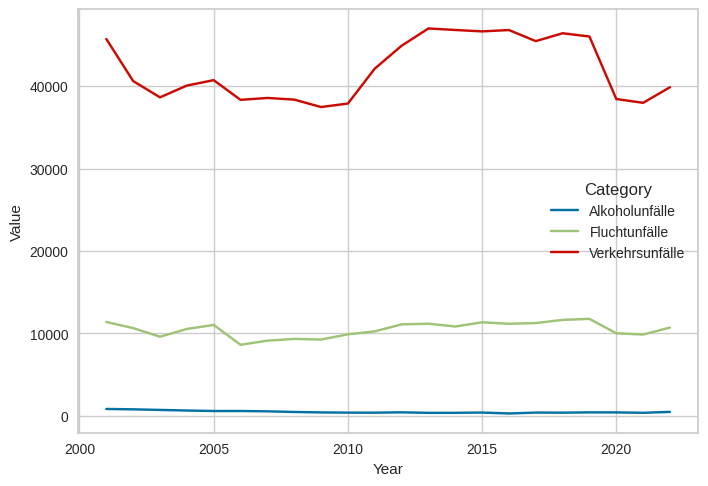

In [11]:
sns.lineplot(data=df[(df["Accident_Type"]=="insgesamt") & (df["Month"]=="Summe")],
             x='Year', y='Value', hue='Category')

From the above graph it is quite evident that 'Verkehrsunfälle' or traffic accidents are far more compared to 'Alkoholunfälle' and 'Fluchtunfälle ('Alcohol accidents', 'escape accidents' respectively)

### Number of accidents per category till 2024 (Bar Plot)

In [13]:
# Plotting the bar chart for the number of accidents per category from 2000 to 2024
fig = px.bar(df[(df["Accident_Type"]=="insgesamt") & (df["Month"]=="Summe")],
              x="Year", y="Value", color='Category', title="Number of Accidents over the years")
fig.show()

In [ ]:
# Save the interactive plot as html file
fig.write_html("Number_Accidents_through_years_bar.html")

## Reducing Analysis till 2020 (inclusive)

In [10]:
old_df = df.copy()
df = df[df["Year"] < 2021]
print("Shape of initial df:",old_df.shape)
print("Shape of required df:",df.shape)

Shape of initial df: (1904, 5)
Shape of required df: (1904, 5)


In [11]:
# Getting a glance into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1904 entries, 50 to 2253
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       1904 non-null   object 
 1   Accident_Type  1904 non-null   object 
 2   Year           1904 non-null   int64  
 3   Month          1904 non-null   object 
 4   Value          1904 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 89.2+ KB


In [12]:
# Getting to know the mean, min=max values of the numeric columns
df.describe()

,Year,Value
count,1904.000000,1904.000000
mean,2010.036765,1408.725315
std,6.037517,4549.574084
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,396.500000
75%,2015.000000,860.250000
max,2020.000000,46988.000000


In [13]:
# Checking for null values
df.isnull().any()

Category         False
Accident_Type    False
Year             False
Month            False
Value            False
dtype: bool

In [14]:
# Remove null values
df = df.dropna()

In [15]:
# Creating a new dataframe to store the total or 'Summe' from Month column
total_df = df[df["Month"]=="Summe"]

In [16]:
# Removing the total or 'Summe' from Month column
df = df[df["Month"]!="Summe"]

In [17]:
df.head()

,Category,Accident_Type,Year,Month,Value
51,Alkoholunfälle,insgesamt,2020,202001,28.0
52,Alkoholunfälle,insgesamt,2020,202002,40.0
53,Alkoholunfälle,insgesamt,2020,202003,27.0
54,Alkoholunfälle,insgesamt,2020,202004,26.0
55,Alkoholunfälle,insgesamt,2020,202005,40.0


In [18]:
# Replacing Month column with integer month values
df['Month'] = df['Month'].str[-2:]
df['Month'] = df['Month'].astype(int)

In [19]:
df.shape

(1764, 5)

Category
Verkehrsunfälle    756
Alkoholunfälle     504
Fluchtunfälle      504
Name: count, dtype: int64


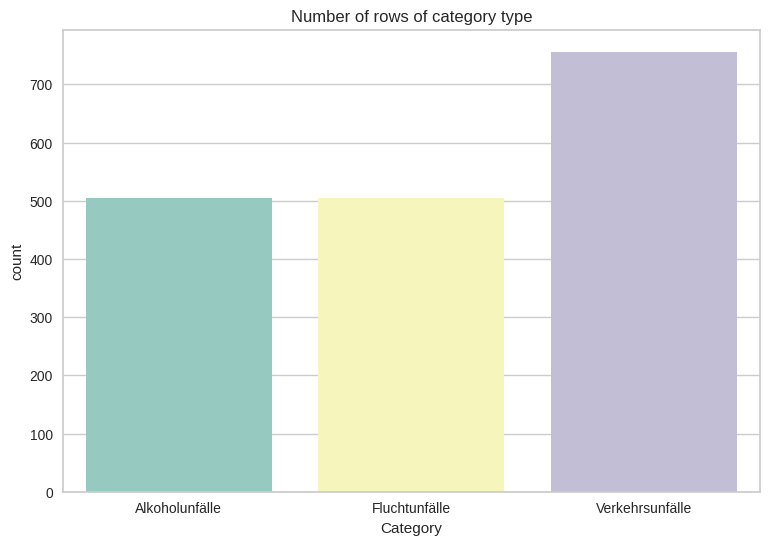

In [28]:
# Total number of rows per category
print(df["Category"].value_counts())
sns.countplot(x ='Category', data = df, palette = "Set3")
plt.title("Number of rows of category type")
plt.gcf().set_size_inches(9,6)

Accident_Type
insgesamt                 756
Verletzte und Getötete    756
mit Personenschäden       252
Name: count, dtype: int64


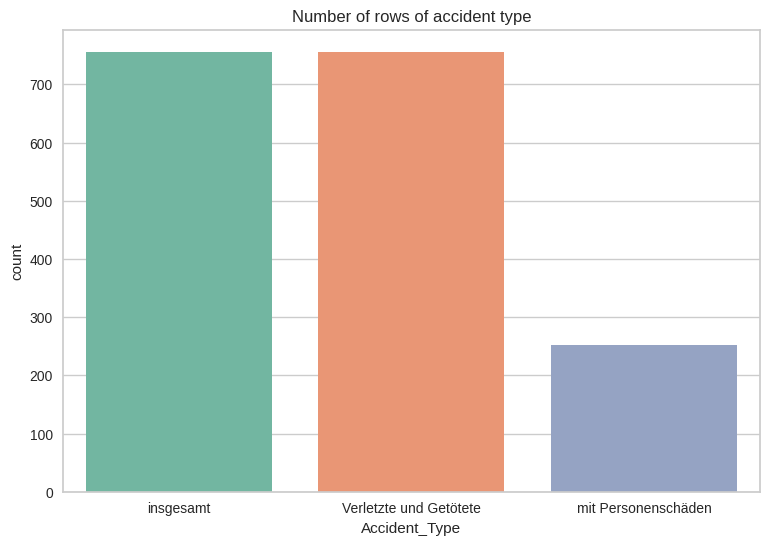

In [29]:
print(df["Accident_Type"].value_counts())
sns.countplot(x ='Accident_Type', data = df, palette = "Set2")
plt.title("Number of rows of accident type")
plt.gcf().set_size_inches(9,6)

<Axes: >

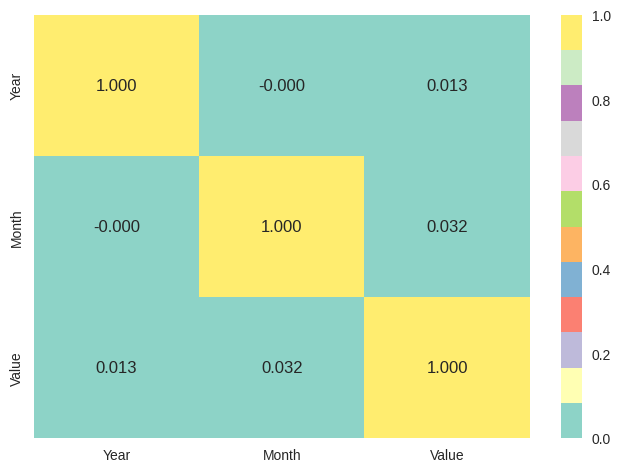

In [ ]:
# Checking for correlation between variables
corr = df[["Year","Month","Value"]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".3f",cmap="Set3")

In [ ]:
corr_df = df.copy()
one_hot_encoded_data = pd.get_dummies(corr_df, columns = ['Accident_Type', 'Category'])
one_hot_encoded_data.head(2)

,Year,Month,Value,Accident_Type_Verletzte und Getötete,Accident_Type_insgesamt,Accident_Type_mit Personenschäden,Category_Alkoholunfälle,Category_Fluchtunfälle,Category_Verkehrsunfälle
0,2020,1,28.0,False,True,False,True,False,False
1,2020,2,40.0,False,True,False,True,False,False


<Axes: >

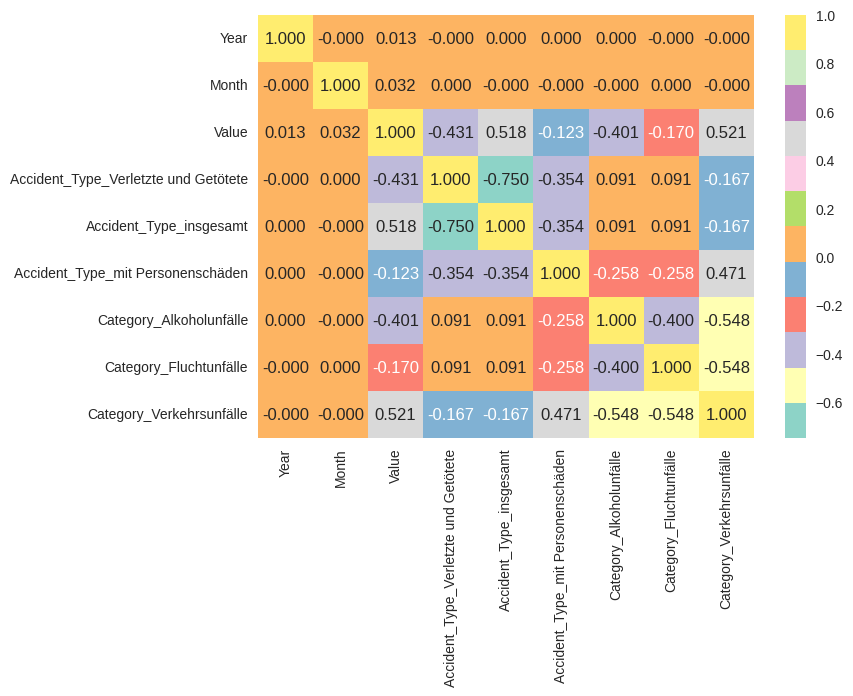

In [ ]:
# Checking for correlation between all the variables
corr = one_hot_encoded_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt=".3f",cmap="Set3")

1. Alcohol-related accidents and hit-and-run accidents tend to have negative correlations with the total number of accidents and traffic accidents, suggesting these types of accidents are less frequent compared to overall and traffic-related accidents.
2. Category_Verkehrsunfälle has a positive correlation with Accident_Type_mit Personenschäden suggesting that an increase in total accidents might not always involve severe outcomes.

In [39]:
# Plot of alcohol accident and accident type "insgesamt" from years 2000 to 2020
start_year = 2000
end_year = 2020
fig = px.line(df[(df["Category"]=="Alkoholunfälle") & (df["Accident_Type"]=="insgesamt") & (df["Year"]>=start_year)
                                                                                            & (df["Year"]<=end_year)],
              x="Month", y="Value", color='Year', markers=True)
fig.show()

In [32]:
# Plot of 'Fluchtunfälle' and accident type "insgesamt" from years 2000 to 2020
start_year = 2000
end_year = 2020
fig = px.line(df[(df["Category"]=="Fluchtunfälle") & (df["Accident_Type"]=="insgesamt")& (df["Year"]>=start_year)
                                                                                            & (df["Year"]<=end_year)],
              x="Month", y="Value", color='Year', markers=True)
fig.show()

In [35]:
# Plot of 'Verkehrsunfälle' and accident type "insgesamt" from years 2000 to 2020
start_year = 2000
end_year = 2020
fig = px.line(df[(df["Category"]=="Verkehrsunfälle") & (df["Accident_Type"]=="insgesamt")& (df["Year"]>=start_year)
                                                                                            & (df["Year"]<=end_year)],
              x="Month", y="Value", color='Year', markers=True)
fig.show()

The above 3 plots where used to analyze if there are more accidents in winter than in summer.
1. But surprisingly, I found that it seems there are more accidents in the month of July compared to all other months for all the categories from 2000 to 2020. In one way if we think it would make some sense since people tend to enjoy and have fun more during the peak summer. And when fun goes above a limit things seems to go out of hand.
2. Another note worthy point was a decline in the number of accidents in the year 2020 when the covid hit which made sense since as a lockdown was imposed


## Model to Forecast

In [20]:
df.dtypes

Category          object
Accident_Type     object
Year               int64
Month              int64
Value            float64
dtype: object

In [21]:
# Sorting the values based on year and month
df = df.sort_values(by=['Year', 'Month'])
df.head()

,Category,Accident_Type,Year,Month,Value
310,Alkoholunfälle,insgesamt,2000,1,78.0
632,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0
954,Fluchtunfälle,insgesamt,2000,1,835.0
1276,Fluchtunfälle,Verletzte und Getötete,2000,1,34.0
1598,Verkehrsunfälle,insgesamt,2000,1,3448.0


In [22]:
# Resetting the index as we had dropped many rows
df.reset_index(inplace=True,drop=True)

In [23]:
df.head(2)

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2000,1,78.0
1,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0


In [126]:
print("Size of required data: ",df.shape)

Size of required data:  (1764, 5)


We have set the shuffling of data to False since it is a time series apporach and when the data is shuffled the pattern in the data will be lost. For example, there is a possibility that more accidents could happen in winter than in the summer as there is chance of black ice development.

# Without shuffling

In [127]:
new_df_setup = setup(df, target = 'Value', session_id = 121, data_split_shuffle = False)

,Description,Value
0,Session id,121
1,Target,Value
2,Target type,Regression
3,Original data shape,"(1764, 5)"
4,Transformed data shape,"(1764, 9)"
5,Transformed train set shape,"(1234, 9)"
6,Transformed test set shape,"(530, 9)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


In [70]:
# Verifying if the data is not shuffled
get_config('X_train').index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233],
      dtype='int64', length=1234)

In [71]:
# Verifying if the data is not shuffled
get_config('X_test').index

Index([1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243,
       ...
       1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763],
      dtype='int64', length=530)

In [72]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,65.4888,14786.6251,119.7682,0.9880,0.2347,0.1818,0.3410
et,Extra Trees Regressor,63.5173,14823.2281,118.9255,0.9879,0.2294,0.1687,0.2950
lightgbm,Light Gradient Boosting Machine,74.5936,15573.6896,123.1423,0.9875,0.5817,0.3840,0.2570
xgboost,Extreme Gradient Boosting,73.5317,16806.4195,127.3437,0.9864,0.4700,0.3097,0.1510
gbr,Gradient Boosting Regressor,76.7404,17719.5266,131.2841,0.9861,0.5651,0.4831,0.3090
dt,Decision Tree Regressor,74.3629,20624.4158,141.8064,0.9836,0.2722,0.2052,0.0840
ada,AdaBoost Regressor,91.1559,26740.9748,160.6461,0.9789,0.3443,0.3018,0.1810
knn,K Neighbors Regressor,352.4790,290817.3484,528.9085,0.7834,1.1468,2.6297,0.0910
llar,Lasso Least Angle Regression,494.4511,362118.8303,599.7541,0.7221,1.7907,8.8484,0.0820
ridge,Ridge Regression,494.4042,362151.1713,599.7794,0.7221,1.7900,8.8494,0.0830


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## With Shuffling

In [24]:
new_df_setup_shuffle = setup(df, target = 'Value', session_id = 121, data_split_shuffle = True)
shuffle_best_model = compare_models()

,Description,Value
0,Session id,121
1,Target,Value
2,Target type,Regression
3,Original data shape,"(1764, 5)"
4,Transformed data shape,"(1764, 9)"
5,Transformed train set shape,"(1234, 9)"
6,Transformed test set shape,"(530, 9)"
7,Numeric features,2
8,Categorical features,2
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,53.1615,10141.1615,99.5876,0.9925,0.5018,0.3861,0.1340
lightgbm,Light Gradient Boosting Machine,56.4516,11073.8676,103.6237,0.9918,0.4581,0.3254,0.3790
rf,Random Forest Regressor,57.7426,13997.4848,116.2669,0.9899,0.2310,0.1728,0.6000
et,Extra Trees Regressor,61.8130,15146.5506,121.7209,0.9889,0.2447,0.1834,0.2940
gbr,Gradient Boosting Regressor,69.7459,14967.8377,121.7407,0.9888,0.6396,0.5803,0.1650
dt,Decision Tree Regressor,69.5550,20696.8418,142.5287,0.9848,0.2921,0.2116,0.0870
ada,AdaBoost Regressor,91.4078,29653.9500,171.3427,0.9778,0.3566,0.3121,0.0990
knn,K Neighbors Regressor,378.4464,361342.9047,594.1522,0.7343,1.1753,2.8301,0.0890
lar,Least Angle Regression,502.3252,377691.9569,613.5259,0.7158,1.8663,10.1866,0.0810
llar,Lasso Least Angle Regression,501.9567,377729.0485,613.5454,0.7158,1.8640,10.1427,0.0790


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [128]:
random_forest_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.3735,10146.2065,100.7284,0.9932,0.1698,0.1147
1,58.3015,9520.9461,97.5753,0.9931,0.2068,0.1501
2,69.1785,17967.5188,134.0430,0.9838,0.2550,0.2141
3,68.4035,16436.8140,128.2061,0.9873,0.2008,0.1489
4,89.1683,28508.8492,168.8456,0.9732,0.2222,0.1894
5,63.5148,12744.3299,112.8908,0.9895,0.1990,0.1613
6,68.9133,16907.8651,130.0302,0.9832,0.2587,0.2294
7,57.1478,9276.4664,96.3144,0.9928,0.2190,0.1797
8,59.6262,11361.9807,106.5926,0.9926,0.3092,0.1961


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [129]:
pred_holdouts = predict_model(random_forest_model)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,60.9529,21997.7862,148.3165,0.9861,0.2275,0.1647


,Category,Accident_Type,Year,Month,Value,prediction_label
1234,Fluchtunfälle,insgesamt,2014,9,936.0,912.35
1235,Fluchtunfälle,Verletzte und Getötete,2014,9,60.0,49.72
1236,Verkehrsunfälle,insgesamt,2014,9,4137.0,3983.82
1237,Verkehrsunfälle,mit Personenschäden,2014,9,534.0,483.03
1238,Verkehrsunfälle,Verletzte und Getötete,2014,9,620.0,566.64


## Checking the best model on Test Data

In [98]:
# Mention the required year to be predicted
required_year = 2021
new_data = old_df[old_df["Year"]==required_year]
new_data = new_data.dropna()
new_data = new_data[new_data["Month"]!="Summe"]
new_data['Month'] = new_data['Month'].str[-2:]
new_data['Month'] = new_data['Month'].astype(int)
new_data

,Category,Accident_Type,Year,Month,Value
38,Alkoholunfälle,insgesamt,2021,1,16.0
39,Alkoholunfälle,insgesamt,2021,2,14.0
40,Alkoholunfälle,insgesamt,2021,3,24.0
41,Alkoholunfälle,insgesamt,2021,4,16.0
42,Alkoholunfälle,insgesamt,2021,5,24.0
...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2021,8,533.0
1978,Verkehrsunfälle,Verletzte und Getötete,2021,9,680.0
1979,Verkehrsunfälle,Verletzte und Getötete,2021,10,561.0
1980,Verkehrsunfälle,Verletzte und Getötete,2021,11,430.0


In [79]:
# Predicting on custom data
predict_new = predict_model(random_forest_model, data=new_data)
predict_new.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,151.6846,95779.0732,309.4819,0.9158,0.3593,0.3359


,Category,Accident_Type,Year,Month,Value,prediction_label
38,Alkoholunfälle,insgesamt,2021,1,16.0,21.08
39,Alkoholunfälle,insgesamt,2021,2,14.0,19.90
40,Alkoholunfälle,insgesamt,2021,3,24.0,31.82
41,Alkoholunfälle,insgesamt,2021,4,16.0,32.89
42,Alkoholunfälle,insgesamt,2021,5,24.0,30.75


In [130]:
# Saving the best model
save_model(random_forest_model, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'Month'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Category', 'Accident_Type'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Category', 'Accident_Type'],
                                     transformer=OneHotEncoder(cols=['Category',
                                                                     'Accident_Type'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  RandomForestRegressor(n_jobs=-1, random_state=121))]),
 'best-model.

## Using Meta Prophet model

In [ ]:
old_df.head()

,Category,Accident_Type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2024,202401,NaN
1,Alkoholunfälle,insgesamt,2024,202402,NaN
2,Alkoholunfälle,insgesamt,2024,202403,NaN
3,Alkoholunfälle,insgesamt,2024,202404,NaN
4,Alkoholunfälle,insgesamt,2024,202405,NaN


In [ ]:
pred = df[df["JAHR"]==2021]
pred

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
37,Alkoholunfälle,insgesamt,2021,Summe,383.0
38,Alkoholunfälle,insgesamt,2021,202101,16.0
39,Alkoholunfälle,insgesamt,2021,202102,14.0
40,Alkoholunfälle,insgesamt,2021,202103,24.0
41,Alkoholunfälle,insgesamt,2021,202104,16.0
...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2021,202108,533.0
1978,Verkehrsunfälle,Verletzte und Getötete,2021,202109,680.0
1979,Verkehrsunfälle,Verletzte und Getötete,2021,202110,561.0
1980,Verkehrsunfälle,Verletzte und Getötete,2021,202111,430.0


In [ ]:
pred = pred.dropna()
pred = pred[pred["MONAT"]!="Summe"]
pred['NUR_MONAT'] = pred['MONAT'].str[-2:]
pred.drop("MONAT",axis=1, inplace=True)
pred['NUR_MONAT'] = pred['NUR_MONAT'].astype(int)
pred

,MONATSZAHL,AUSPRAEGUNG,JAHR,WERT,NUR_MONAT
38,Alkoholunfälle,insgesamt,2021,16.0,1
39,Alkoholunfälle,insgesamt,2021,14.0,2
40,Alkoholunfälle,insgesamt,2021,24.0,3
41,Alkoholunfälle,insgesamt,2021,16.0,4
42,Alkoholunfälle,insgesamt,2021,24.0,5
...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2021,533.0,8
1978,Verkehrsunfälle,Verletzte und Getötete,2021,680.0,9
1979,Verkehrsunfälle,Verletzte und Getötete,2021,561.0,10
1980,Verkehrsunfälle,Verletzte und Getötete,2021,430.0,11


In [ ]:
predict_model(best, data = pred)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,87.7978,35242.0938,187.7288,0.9690,0.4404,0.3837


,MONATSZAHL,AUSPRAEGUNG,JAHR,NUR_MONAT,WERT,prediction_label
38,Alkoholunfälle,insgesamt,2021,1,16.0,44.781574
39,Alkoholunfälle,insgesamt,2021,2,14.0,42.637047
40,Alkoholunfälle,insgesamt,2021,3,24.0,26.259575
41,Alkoholunfälle,insgesamt,2021,4,16.0,15.260848
42,Alkoholunfälle,insgesamt,2021,5,24.0,39.930817
...,...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2021,8,533.0,589.676941
1978,Verkehrsunfälle,Verletzte und Getötete,2021,9,680.0,625.169128
1979,Verkehrsunfälle,Verletzte und Getötete,2021,10,561.0,575.799133
1980,Verkehrsunfälle,Verletzte und Getötete,2021,11,430.0,350.885193
